In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# Airline passenger satisfaction

Context:
https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?



# I. EDA

## DATASET DESCRIPTION
- Where does the dataset comes from: US Airline passenger satisfaction survey (no more explonations?) <font color='red'>which company etc ??</font>
- train: (103904, 24)
- test: (25976, 24)
- Dependent variable y: satisfaction 

In [12]:
#loading the train set
raw_train = pd.read_csv('train.csv', 
                        index_col=0,
                        dtype= {   
                        'Gender':'category',
                        'Customer Type':'category',
                        'Type of Travel':'category',
                        'Class':'category',
                        'Inflight wifi service':'int64',
                        'Departure/Arrival time convenient':'int64',
                        'Ease of Online booking':'int64',
                        'Gate location':'int64',
                        'Food and drink':'int64',
                        'Online boarding':'int64',
                        'Seat comfort':'int64',
                        'Inflight entertainment':'int64',
                        'On-board service':'int64',
                        'Leg room service':'int64',
                        'Baggage handling':'int64',
                        'Checkin service':'int64',
                        'Inflight service':'int64',
                        'Cleanliness':'int64',
                        'Arrival Delay in Minutes':'float64',
                        'Departure Delay in Minutes': 'float64',
                        'satisfaction':'category'
                        }
                       )
#loading the test set
raw_test = pd.read_csv('test.csv', 
                        index_col=0,
                        dtype= {   
                        'Gender':'category',
                        'Customer Type':'category',
                        'Type of Travel':'category',
                        'Class':'category',
                        'Inflight wifi service':'int64',
                        'Departure/Arrival time convenient':'int64',
                        'Ease of Online booking':'int64',
                        'Gate location':'int64',
                        'Food and drink':'int64',
                        'Online boarding':'int64',
                        'Seat comfort':'int64',
                        'Inflight entertainment':'int64',
                        'On-board service':'int64',
                        'Leg room service':'int64',
                        'Baggage handling':'int64',
                        'Checkin service':'int64',
                        'Inflight service':'int64',
                        'Cleanliness':'int64',
                        'Arrival Delay in Minutes':'float64',
                        'Departure Delay in Minutes': 'float64',
                        'satisfaction':'category'
                        }
                       )
#We combine both datasets for some analysis
raw_df = pd.concat([raw_train, raw_test], axis=0)

#we record the id and the idx:
idx_train = raw_train.index
idx_test = raw_test.index

In [13]:
print(raw_train.shape, raw_test.shape)

(103904, 24) (25976, 24)


In [14]:
#quick check
raw_df.dtypes

id                                      int64
Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Inflight service                        int64
Cleanliness                             int64
Departure Delay in Minutes        

## VARIABLE DESCRIPTION

https://docs.google.com/spreadsheets/d/1bJZmSWa618q4gXTbbeCLH9Dvv2Zmrz0lArizsj4NQe8/edit#gid=241349301


Let's try do guess which variables are the most likely to be important in the prediction:
Personally, I would have said:
- Departure and arrival delays
- On-board service
- Baggage handling
- Type of travel


In [15]:
raw_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,satisfied


## MISSING VALUES

In [16]:
total = raw_df.isna().sum().sort_values(ascending=False)
percent = total / total.sum() * 100
pd.concat([total[total >0], percent[percent >0]], axis=1, keys= ['Total', 'Percent'])

,Total,Percent
Arrival Delay in Minutes,393,100.0


Only one variable 'Arrival Delay in Minutes' contains missing values. Precisely, it contains 393 missing values. Let's investigate why these values are missing and how can we deal with it.

In [17]:
#Missing values
raw_df.loc[raw_df['Arrival Delay in Minutes'].isna(), ['Departure Delay in Minutes', 'Arrival Delay in Minutes']]

,Departure Delay in Minutes,Arrival Delay in Minutes
213,31.0,NaN
1124,38.0,NaN
1529,11.0,NaN
2004,41.0,NaN
2108,1.0,NaN
...,...,...
24072,26.0,NaN
24133,19.0,NaN
24301,0.0,NaN
25128,0.0,NaN


In [18]:
raw_df.loc[:, ['Departure Delay in Minutes', 'Arrival Delay in Minutes']]

,Departure Delay in Minutes,Arrival Delay in Minutes
0,25.0,18.0
1,1.0,6.0
2,0.0,0.0
3,11.0,9.0
4,0.0,0.0
...,...,...
25971,0.0,0.0
25972,0.0,0.0
25973,0.0,0.0
25974,0.0,0.0


What is the probability to arrive on time when your left the airport on time? 

Proba to arrive on time: 0.56
Proba to arrive on time when leaving on time: 0.81


''

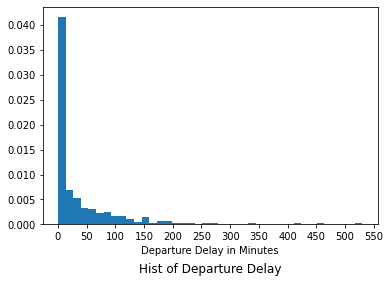

In [19]:
##Proba to arrive on time
total = raw_df.loc[raw_df['Arrival Delay in Minutes'].isna()==False,:].shape[0]
arr_on_time = raw_df.loc[(raw_df['Arrival Delay in Minutes'].isna()==False) & (raw_df['Arrival Delay in Minutes']==0),:].shape[0]
p0 = arr_on_time/total
print(f'Proba to arrive on time: {p0:.2f}')

#Proba to arrive on time when leaving on time
total_dep_on_time = raw_df.loc[(raw_df['Departure Delay in Minutes'] ==0) &  (raw_df['Arrival Delay in Minutes'].isna()== False),:].shape[0]
dep_and_arr_on_time = raw_df.loc[(raw_df['Departure Delay in Minutes'] ==0) &  (raw_df['Arrival Delay in Minutes']== 0),:].shape[0]
p1 = dep_and_arr_on_time / total_dep_on_time
print(f'Proba to arrive on time when leaving on time: {p1:.2f}')

#Basically, is intuition is that, the more you have departure delay, the more likely you'll have arrival delay
#let's look at the departure delay distribution for our missing values
#distribution of departure delay (numerical) -> hist
df = raw_df.loc[raw_df['Arrival Delay in Minutes'].isna(), :]
fig, ax = plt.subplots()
ax.hist(df['Departure Delay in Minutes'], density=True, bins=40)
ax.set_xlabel('Departure Delay in Minutes')
ax.set_title('Hist of Departure Delay', y=-0.25)
ax.set_xticks(np.arange(0, 600, 50))
;


''

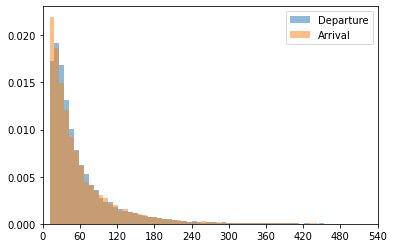

In [122]:
#Does leaving x minutes late means arriving x minutes late? Or does the pilote succeed to get back some time?
#in the case where the plan leave the airport with some delay
df = raw_df.loc[(raw_df['Arrival Delay in Minutes'].isna()==False) & (raw_df['Departure Delay in Minutes'] > 10) & (raw_df['Arrival Delay in Minutes'] > 10),:]
bins = 200
fig , ax = plt.subplots()
ax.hist(df['Departure Delay in Minutes'], bins=bins, density=True, alpha= 0.5, label= 'Departure')
ax.hist(df['Arrival Delay in Minutes'], bins=bins,density=True, alpha= 0.5,label ='Arrival')
ax.set_xlim(0,500)
ax.set_xticks(np.arange(0, 600, 60))
ax.legend(loc = 'upper right')
#ax.set_title('Hist of departure and arrival delays \n (starting from 10 minutes late)', y = -0.3)
plt.savefig('./images/hist_dep_arr_delay.png')
;

We see that both histogram are almost layered => we can make the hypothesis that departure delay is approximately the same as the arrival delay

In [21]:
#filling values
big_df = raw_df.copy()

In [22]:
big_df = big_df.fillna({'Arrival Delay in Minutes': big_df['Departure Delay in Minutes']})

In [23]:
#quick verification that there isn't any missing values 
assert big_df.isna().sum().sum() == 0, 'There are still some missing values!'

## OUTLIERS

Still on arrival and departure delays

In [24]:
# arrival and departure delays
d = max(raw_df['Departure Delay in Minutes'])
a = max(raw_df['Arrival Delay in Minutes'])
print(f'max departure delay: {d:.2f}, max arrival delay: {a:.2f}')

max departure delay: 1592.00, max arrival delay: 1584.00


number of values with either (or both) departure time or arrival time > 600 minutes: 26


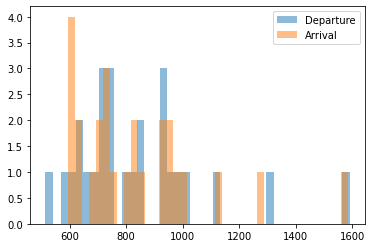

In [25]:
df = raw_df.loc[(raw_df['Departure Delay in Minutes'] > 600) | (raw_df['Arrival Delay in Minutes'] > 600),:]
print('number of values with either (or both) departure time or arrival time > 600 minutes:', df.shape[0])
bins = 40
fig , ax = plt.subplots()
ax.hist(df['Departure Delay in Minutes'], bins=bins, alpha= 0.5, label= 'Departure')
ax.hist(df['Arrival Delay in Minutes'], bins=bins, alpha= 0.5,label ='Arrival')
ax.legend(loc = 'upper right');

## UNIVARIATE DATA-ANALYSIS



In [27]:
big_df.dtypes

id                                      int64
Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Inflight service                        int64
Cleanliness                             int64
Departure Delay in Minutes        

In [28]:
big_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,satisfied


In [29]:
#gender
big_df['Gender'].value_counts(normalize=True)*100

Female    50.738374
Male      49.261626
Name: Gender, dtype: float64

In [30]:
#customer type
big_df['Customer Type'].value_counts(normalize=True)*100

Loyal Customer       81.690791
disloyal Customer    18.309209
Name: Customer Type, dtype: float64

(30-50]    0.426532
(0-30]     0.314752
(> 50)     0.258716
Name: Age_group, dtype: float64

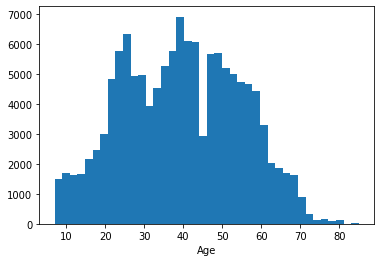

In [126]:
#age
fig, ax = plt.subplots()
ax.hist(big_df['Age'], bins=40)
#ax.set_title('Hist of Age')
ax.set_xlabel('Age')
plt.savefig('./images/hist_age.png')
;

##Let's transforme this variable into a categorical variable
'''
(0-21]
(21-35]
(35-45]
(45-50]
(> 50)
'''
big_df['Age_group'] = np.nan
big_df.loc[big_df['Age'] <=30, ['Age_group']] = '(0-30]'
big_df.loc[(big_df['Age'] > 30) & (big_df['Age'] <= 50), ['Age_group']] = '(30-50]'
big_df.loc[big_df['Age'] > 50, ['Age_group']] = '(> 50)'
big_df['Age_group'] = big_df['Age_group'].astype('category')

assert big_df['Age_group'].isna().sum() == 0, 'you forgot some values'
big_df['Age_group'].value_counts(normalize=True)

In [32]:
#type of travel
big_df['Type of Travel'].value_counts(normalize=True)*100

Business travel    69.058362
Personal Travel    30.941638
Name: Type of Travel, dtype: float64

In [33]:
#class
big_df['Class'].value_counts(normalize=True)*100

Business    47.859563
Eco         44.894518
Eco Plus     7.245919
Name: Class, dtype: float64

count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: Flight Distance, dtype: float64


Short-haul     57.824915
Medium-haul    34.234678
Long-haul       7.940407
Name: Flight Distance_group, dtype: float64

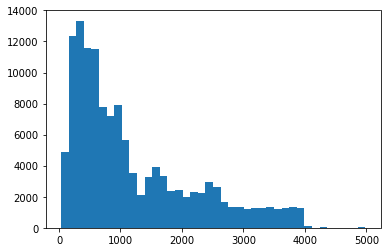

In [148]:
#Flight Distance
fig, ax = plt.subplots()
ax.hist(big_df['Flight Distance'], bins= 40)
#ax.set_title('Hist of flight distance')
plt.savefig('images/hist_flight_dist.png')
;

print(big_df['Flight Distance'].describe())
"""
Commercial flights are often categorized into long-, medium- or short-haul 
by commercial airlines based on flight length. (there is no international standard definition)
tend to define short-haul routes as being shorter than 600–800 nmi (1,100–1,500 km), long-haul as being longer than 
2,200–2,600 nmi (4,100–4,800 km), 
and medium-haul as being in-between.

In kms
Short-haul (0-1000]
Medium-haul (1000-3000]
Long-haul (>3000)
"""
big_df['Flight Distance_group'] = np.nan
big_df.loc[big_df['Flight Distance'] <= 1000, ['Flight Distance_group']] = 'Short-haul'
big_df.loc[(big_df['Flight Distance'] > 1000) & (big_df['Flight Distance'] <= 3000), ['Flight Distance_group']] = 'Medium-haul'                                                                            
big_df.loc[(big_df['Flight Distance'] > 3000), ['Flight Distance_group']] = 'Long-haul'

assert big_df['Flight Distance_group'].isna().sum() ==0, 'Flight distance var not good'
big_df['Flight Distance_group'] = big_df['Flight Distance_group'].astype('category')
big_df['Flight Distance_group'].value_counts(normalize=True)*100


**Satisfaction scores**


In [138]:
sat_idx = ['Inflight wifi service','Departure/Arrival time convenient',
           'Ease of Online booking','Gate location',
           'Food and drink','Online boarding','Seat comfort',
           'Inflight entertainment','On-board service',
           'Leg room service','Baggage handling',
           'Checkin service','Inflight service','Cleanliness']

In [139]:
tmp = big_df.loc[:, sat_idx]
tmp.shape

(129880, 14)

''

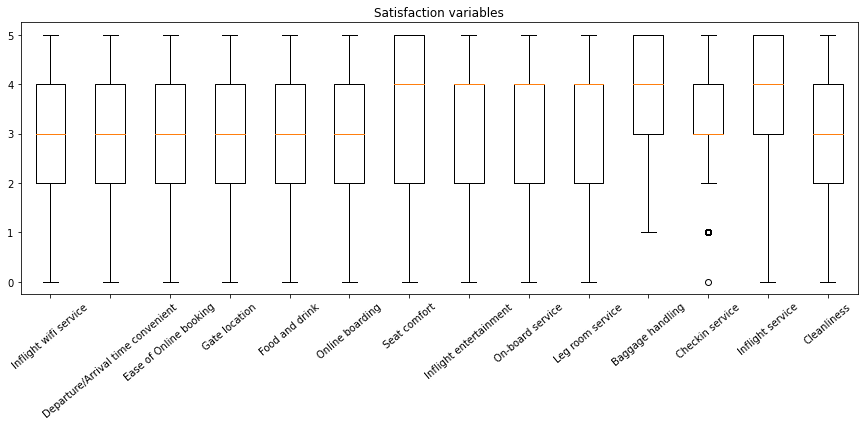

In [140]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.boxplot(tmp, labels=tmp.columns,)
ax.set_title('Satisfaction variables')
ax.set_xticklabels(tmp.columns, rotation=40)
;

''

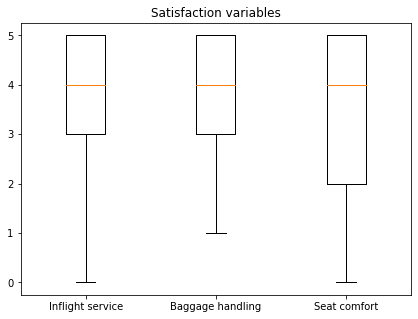

In [141]:
tmp = tmp.loc[:, ['Inflight service', 'Baggage handling', 'Seat comfort']]
fig, ax = plt.subplots(figsize=(7, 5))
ax.boxplot(tmp, labels=tmp.columns,)
ax.set_title('Satisfaction variables')
ax.set_xticklabels(tmp.columns, rotation=0)
plt.savefig('images/boxplot_1.png')
;

''

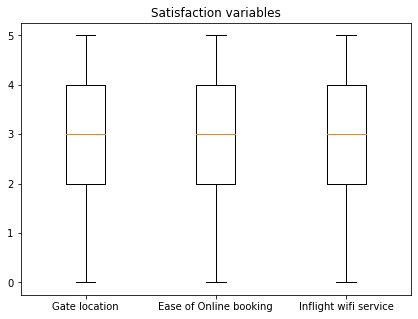

In [142]:
tmp = big_df.loc[:, ['Gate location', 'Ease of Online booking', 'Inflight wifi service']]
fig, ax = plt.subplots(figsize=(7, 5))
ax.boxplot(tmp, labels=tmp.columns,)
ax.set_title('Satisfaction variables')
ax.set_xticklabels(tmp.columns, rotation=0)
plt.savefig('images/boxplot_2.png')
;


In [38]:
tmp.mean().sort_values(ascending=False)

Inflight service                     3.642193
Baggage handling                     3.632114
Seat comfort                         3.441361
On-board service                     3.383023
Inflight entertainment               3.358077
Leg room service                     3.350878
Checkin service                      3.306267
Cleanliness                          3.286326
Online boarding                      3.252633
Food and drink                       3.204774
Departure/Arrival time convenient    3.057599
Gate location                        2.976925
Ease of Online booking               2.756876
Inflight wifi service                2.728696
dtype: float64

People seem to be very satisfied with Inflight service, bagage handling and seat comfort as these variables get the high mean satisfaction, (respectively 3.64, 3.63 and 3.44). 
On the other hand, the company's performance is less impressive with the Gate location, the ease of Online booking and the Inflight wifi service (respectively 2.97, 2.75, 2.72).

The company should probably work on these 3 last topics in order to improve their overall quality service. But, we don't know if these variables are really important in the final decision of the customer (satisfied or dissatisfied). In other words, we don't know the weights of these variables in the last decision.  

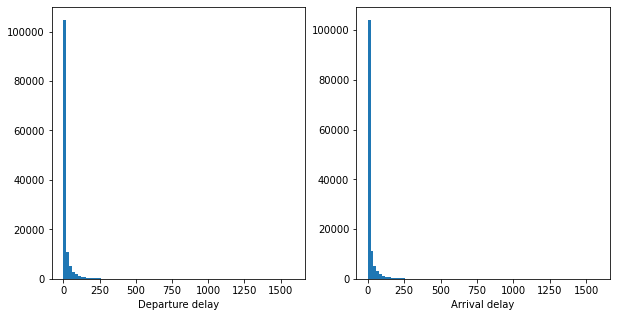

In [147]:
fig ,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(big_df['Departure Delay in Minutes'], bins=80)
ax[0].set_xlabel('Departure delay')
ax[1].hist(big_df['Arrival Delay in Minutes'],bins=80)
ax[1].set_xlabel('Arrival delay')
plt.savefig('images/both_arr_dep_del.png')

on_time                 56.479828
more_than_10min_late    26.757006
less_than_10min_late    16.763166
Name: Departure Delay in Minutes_group, dtype: float64

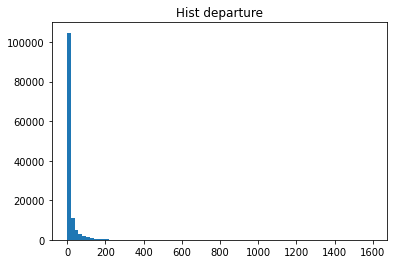

In [52]:
# Departure Delay in Minutes
fig ,ax = plt.subplots()
ax.hist(big_df['Departure Delay in Minutes'], bins=80)
ax.set_title('Hist departure');

#Let's create a 
big_df['Departure Delay in Minutes_group'] = np.nan
big_df.loc[big_df['Departure Delay in Minutes'] == 0, 'Departure Delay in Minutes_group'] = 'on_time'
big_df.loc[(big_df['Departure Delay in Minutes'] > 0) & (big_df['Departure Delay in Minutes'] <= 10), 'Departure Delay in Minutes_group'] = 'less_than_10min_late'
big_df.loc[big_df['Departure Delay in Minutes'] > 10, 'Departure Delay in Minutes_group'] = 'more_than_10min_late'

assert big_df['Departure Delay in Minutes_group'].isna().sum() == 0, 'Error'

big_df['Departure Delay in Minutes_group'] = big_df['Departure Delay in Minutes_group'].astype('category')
big_df['Departure Delay in Minutes_group'].value_counts(normalize=True)*100

on_time                 56.128734
more_than_10min_late    27.787188
less_than_10min_late    16.084078
Name: Arrival Delay in Minutes_group, dtype: float64

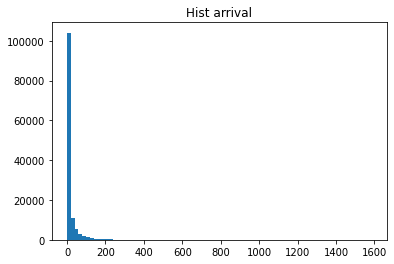

In [53]:
# Arrival Delay in Minutes
fig ,ax = plt.subplots()
ax.hist(big_df['Arrival Delay in Minutes'], bins=80)
ax.set_title('Hist arrival');

#Let's create a 
big_df['Arrival Delay in Minutes_group'] = np.nan
big_df.loc[big_df['Arrival Delay in Minutes'] == 0, 'Arrival Delay in Minutes_group'] = 'on_time'
big_df.loc[(big_df['Arrival Delay in Minutes'] > 0) & (big_df['Arrival Delay in Minutes'] <= 10), 'Arrival Delay in Minutes_group'] = 'less_than_10min_late'
big_df.loc[big_df['Arrival Delay in Minutes'] > 10, 'Arrival Delay in Minutes_group'] = 'more_than_10min_late'

assert big_df['Arrival Delay in Minutes_group'].isna().sum() == 0, 'Error'

big_df['Arrival Delay in Minutes_group'] = big_df['Arrival Delay in Minutes_group'].astype('category')
big_df['Arrival Delay in Minutes_group'].value_counts(normalize=True)*100

## THE DEPENDENT VARIABLE : SATISFACTION

neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: satisfaction, dtype: float64


c:\users\colab1\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

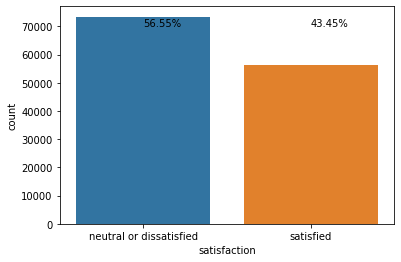

In [123]:
#satisfaction
tmp = big_df['satisfaction'].value_counts(normalize=True)*100
print(tmp)
fig, ax = plt.subplots()
sns.countplot(big_df['satisfaction'], ax = ax)
ax.text(0,70000, f'{tmp[0]:.2f}%')
ax.text(1,70000, f'{tmp[1]:.2f}%')
plt.savefig('./images/barplot_dep_var.png')
;

Balanced dataset => accuracy

## FEATURE ENGINEERING

In [55]:
big_df.iloc[:1, ]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_group,Flight Distance_group,Departure Delay in Minutes_group,Arrival Delay in Minutes_group
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,5,5,25.0,18.0,neutral or dissatisfied,(0-30],Short-haul,more_than_10min_late,more_than_10min_late


on_time                 45.809978
more_than_10min_late    35.341854
less_than_10min_late    18.848168
Name: total_delay_group, dtype: float64

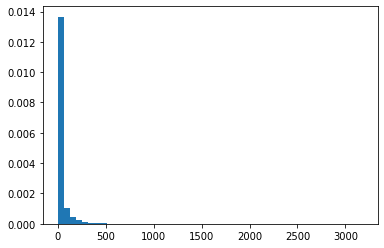

In [56]:
#total_delay
big_df = big_df.assign(total_delay= big_df['Departure Delay in Minutes'] + big_df['Arrival Delay in Minutes'])
fig , ax = plt.subplots()
ax.hist(big_df['total_delay'], bins=50, density=True);

#total_delay_group
big_df['total_delay_group'] = np.nan
big_df.loc[big_df['total_delay'] == 0, 'total_delay_group'] = 'on_time'
big_df.loc[(big_df['total_delay'] > 0) & (big_df['total_delay'] <= 10), 'total_delay_group'] = 'less_than_10min_late'
big_df.loc[big_df['total_delay'] > 10, 'total_delay_group'] = 'more_than_10min_late'

assert big_df['total_delay_group'].isna().sum() == 0, 'Error'
big_df['total_delay_group'] = big_df['total_delay_group'].astype('category')
big_df['total_delay_group'].value_counts(normalize=True)*100

In [57]:
#mean_satisfaction
sati_idx = ['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking','Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

##df containing only satisfaction variables
df = big_df.loc[:, sati_idx]
df.head(n=1)
big_df = big_df.assign(mean_satisfaction = df.mean(axis=1))

''

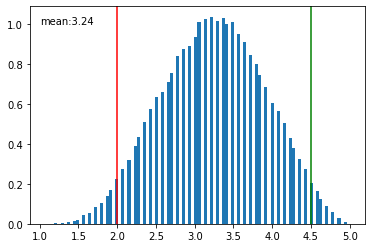

In [153]:
mean, std = big_df['mean_satisfaction'].mean(), big_df['mean_satisfaction'].std()
fig, ax = plt.subplots()
ax.hist(big_df['mean_satisfaction'], bins =100, density=True)
#ax.set_title(f'Hist of mean satisfaction \n mean: {mean:.2f}')
ax.axvline(2, color='red')
ax.axvline(4.5, color='green')
ax.text(1,1, f'mean:{mean:.2f}')
#ax.text(1, 1, 'very unsatisfied \n cust.', color='r')
#ax.text(4, 1, 'very satisfied \n cust.', color='g')
plt.savefig('images/mean_satisf_distrib.png')
;

## DRAWING THE PROFIL OF EXTREMUMS

Note that the mean_satisfaction variable doesn't take into account several important independant variables related to the flight such as the delay (departure and arrival), the aim of Travel (business vs perso), the class, the type of flight (short, medium, long haul)..

Let's create several groups:

- The very dissatisfied (very low mean satisfaction score and unsatisfied)
- The dissatisfied
- The satisfied 
- The very satisfied (very high mean satisfaction score and satisfied)

(-> represent the different types of profiles with a line)
First we compare satisfied and unsatisfied !


After we look the very satisfied and very unsatisfied AND what's the profile of the loyal customer or even the customer that takes business class


In [59]:
from IPython.display import display_html

#useful functions
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
def conditional_distributions(df, name):
    d1 = pd.crosstab(df.loc[df['satisfaction']=='neutral or dissatisfied', name], df.loc[df['satisfaction']=='neutral or dissatisfied','satisfaction'])
    d2 = round(pd.crosstab(df.loc[df['satisfaction']=='neutral or dissatisfied', name], df.loc[df['satisfaction']=='neutral or dissatisfied','satisfaction'], normalize='columns'),2)*100
    d3 = pd.crosstab(df.loc[df['satisfaction']=='satisfied', name], df.loc[df['satisfaction']=='satisfied','satisfaction'])
    d4 = round(pd.crosstab(df.loc[df['satisfaction']=='satisfied', name], df.loc[df['satisfaction']=='satisfied','satisfaction'], normalize='columns'),2)*100    
    df_tmp1 = pd.concat([d1,d2], axis=1, keys=['Effectif', 'Pourcentage'])
    df_tmp2 = pd.concat([d3,d4], axis=1, keys=['Effectif', 'Pourcentage'])
    display_side_by_side(df_tmp1, df_tmp2)

### satisfied / unsatisfied

Not interesting: gender (50:50), 

In [60]:
conditional_distributions(big_df, 'Type of Travel')

,Effectif,Pourcentage
satisfaction,neutral or dissatisfied,neutral or dissatisfied
Type of Travel,,
Business travel,37337,51.0
Personal Travel,36115,49.0
,Effectif,Pourcentage
satisfaction,satisfied,satisfied
Type of Travel,,
Business travel,52356,93.0
Personal Travel,4072,7.0


In [61]:
conditional_distributions(big_df, 'Customer Type')

,Effectif,Pourcentage
satisfaction,neutral or dissatisfied,neutral or dissatisfied
Customer Type,,
Loyal Customer,55372,75.0
disloyal Customer,18080,25.0
,Effectif,Pourcentage
satisfaction,satisfied,satisfied
Customer Type,,
Loyal Customer,50728,90.0
disloyal Customer,5700,10.0


In [62]:
conditional_distributions(big_df, 'Class')

,Effectif,Pourcentage
satisfaction,neutral or dissatisfied,neutral or dissatisfied
Class,,
Business,18994,26.0
Eco,47366,64.0
Eco Plus,7092,10.0
,Effectif,Pourcentage
satisfaction,satisfied,satisfied
Class,,
Business,43166,76.0
Eco,10943,19.0


In [63]:
conditional_distributions(big_df,'Age_group')

,Effectif,Pourcentage
satisfaction,neutral or dissatisfied,neutral or dissatisfied
Age_group,,
(0-30],28306,39.0
(30-50],27137,37.0
(> 50),18009,25.0
,Effectif,Pourcentage
satisfaction,satisfied,satisfied
Age_group,,
(0-30],12574,22.0
(30-50],28261,50.0


In [64]:
conditional_distributions(big_df, 'Flight Distance_group')

,Effectif,Pourcentage
satisfaction,neutral or dissatisfied,neutral or dissatisfied
Flight Distance_group,,
Long-haul,2336,3.0
Medium-haul,20846,28.0
Short-haul,50270,68.0
,Effectif,Pourcentage
satisfaction,satisfied,satisfied
Flight Distance_group,,
Long-haul,7977,14.0
Medium-haul,23618,42.0


In [65]:
#suprisingly, the total delay doesn't have much impact!!
conditional_distributions(big_df, 'total_delay_group')

,Effectif,Pourcentage
satisfaction,neutral or dissatisfied,neutral or dissatisfied
total_delay_group,,
less_than_10min_late,13303,18.0
more_than_10min_late,28716,39.0
on_time,31433,43.0
,Effectif,Pourcentage
satisfaction,satisfied,satisfied
total_delay_group,,
less_than_10min_late,11177,20.0
more_than_10min_late,17186,30.0


In [66]:
s = big_df.loc[big_df.satisfaction == 'satisfied', 'mean_satisfaction'].mean()
us = big_df.loc[big_df.satisfaction != 'satisfied', 'mean_satisfaction'].mean()
print(f'Comparison of the mean satisfaction, satisfied {s:.2f} vs dissatisfied {us:.2f}')

Comparison of the mean satisfaction, satisfied 3.62 vs dissatisfied 2.95








# BIVARIATE DATA-ANALYSIS

28 variables => 2 among 28 pairs 

In [67]:
sat_idx = ['Inflight wifi service','Departure/Arrival time convenient',
           'Ease of Online booking','Gate location',
           'Food and drink','Online boarding','Seat comfort',
           'Inflight entertainment','On-board service',
           'Leg room service','Baggage handling',
           'Checkin service','Inflight service','Cleanliness']

In [68]:
num_idx = list(big_df.dtypes[big_df.dtypes != 'category'].index)
num_idx.remove('id')
for x in sat_idx:
    num_idx.remove(x)
print(f'numerical variables: {num_idx}, len: {len(num_idx)}')

numerical variables: ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'total_delay', 'mean_satisfaction'], len: 6


In [69]:
cat_idx = list(big_df.dtypes[big_df.dtypes == 'category'].index)
print(f'categorical variables: {cat_idx}, len: {len(cat_idx)}')

categorical variables: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction', 'Age_group', 'Flight Distance_group', 'Departure Delay in Minutes_group', 'Arrival Delay in Minutes_group', 'total_delay_group'], len: 10


### num/num

''

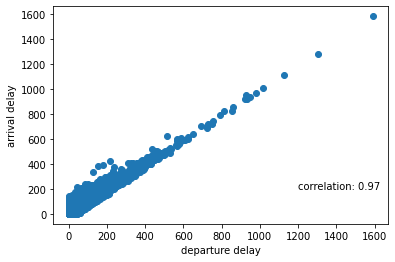

In [154]:
corr =  big_df['Departure Delay in Minutes'].corr(big_df['Arrival Delay in Minutes'])
fig ,ax = plt.subplots()
ax.scatter(big_df['Departure Delay in Minutes'], big_df['Arrival Delay in Minutes'])
#ax.set_title('Scatter departure / arrival delay')
ax.text(1200, 200, f'correlation: {corr:.2f}')
ax.set_xlabel('departure delay')
ax.set_ylabel('arrival delay')
plt.savefig('images/scatter.png')
;

Without Many suprise the delay at derparture is strongly and positively corrolated to the arrival's delay

''

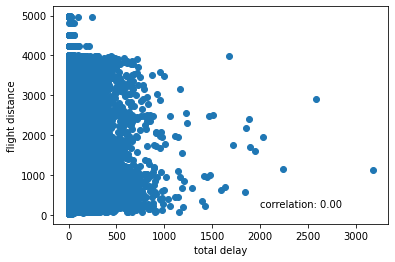

In [157]:
corr =  big_df['total_delay'].corr(big_df['Flight Distance'])
fig ,ax = plt.subplots()
ax.scatter(big_df['total_delay'], big_df['Flight Distance'])
#ax.set_title('Scatter total delay / fligh distance')
ax.text(2000, 200, f'correlation: {corr:.2f}')
ax.set_xlabel('total delay')
ax.set_ylabel('flight distance')
plt.savefig('images/scatter_delay_dist.png')
;

### num/cat

In [72]:
big_df.dtypes

id                                      int64
Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Inflight service                        int64
Cleanliness                             int64
Departure Delay in Minutes        

c:\users\colab1\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

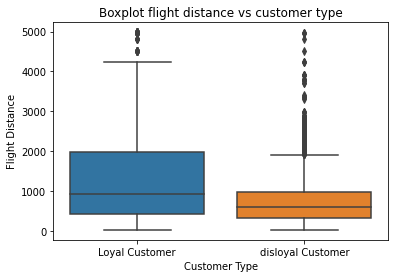

In [73]:
#flight_distance/Customer type
#are your loyal customers more likely to do long / short haul? 
fig, ax = plt.subplots()
sns.boxplot(big_df['Customer Type'], big_df['Flight Distance'])
ax.set_title('Boxplot flight distance vs customer type')
;

Your loyal customers are more likely to do long flight distances. The median is higher for the loyal customer

c:\users\colab1\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

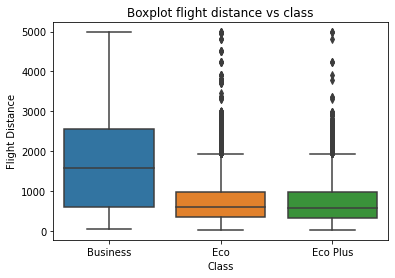

In [74]:
#flight_distance/class
#there should be more business for long distance 
fig, ax = plt.subplots()
sns.boxplot(big_df['Class'], big_df['Flight Distance'])
ax.set_title('Boxplot flight distance vs class')
;

Without surprise, Business individuals tend to do more long hauls than the other categories

c:\users\colab1\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

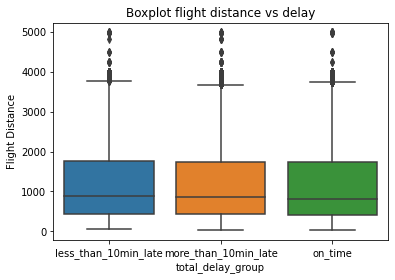

In [75]:
#total_delay/flight_distance
#is their more chance to be late on short or on long distance flights?
fig, ax = plt.subplots()
sns.boxplot(big_df['total_delay_group'], big_df['Flight Distance'])
ax.set_title('Boxplot flight distance vs delay')
;

The delay doesn't seems to be corrolated with the flight distance. That means that you have almsot equal chance to arrive on time with a long haul and a short haul. This is quite surprising

### cat/cat


**What is the profil of the Loyal customer?**
(we will also use some numerical variables)

In [76]:
#numerical information for the loyal customers??
#loyal customers
lc = big_df.loc[big_df['Customer Type'] == 'Loyal Customer', :]
#disloyal customers
dc = big_df.loc[big_df['Customer Type'] == 'disloyal Customer', :]

#distribution
print(f'Loyal: {lc.shape[0]}, disloyal: {dc.shape[0]}')
print(f'Loyal: {lc.shape[0]/(lc.shape[0]+dc.shape[0])*100:.2f}%, disloyal: {dc.shape[0]/(lc.shape[0]+dc.shape[0])*100:.2f}%')
#Most of the customers are loyal! This seems to be a great idea to know more about them

Loyal: 106100, disloyal: 23780
Loyal: 81.69%, disloyal: 18.31%


In [77]:
cat_idx

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'satisfaction',
 'Age_group',
 'Flight Distance_group',
 'Departure Delay in Minutes_group',
 'Arrival Delay in Minutes_group',
 'total_delay_group']

In [78]:
#modifying the function for the Loyal vs disloyal cust
def conditional_distributions(df, name):
    d1 = pd.crosstab(df.loc[df['Customer Type']=='disloyal Customer', name], df.loc[df['Customer Type']=='disloyal Customer','Customer Type'])
    d2 = round(pd.crosstab(df.loc[df['Customer Type']=='disloyal Customer', name], df.loc[df['Customer Type']=='disloyal Customer','Customer Type'], normalize='columns'),2)*100
    d3 = pd.crosstab(df.loc[df['Customer Type']=='Loyal Customer', name], df.loc[df['Customer Type']=='Loyal Customer','Customer Type'])
    d4 = round(pd.crosstab(df.loc[df['Customer Type']=='Loyal Customer', name], df.loc[df['Customer Type']=='Loyal Customer','Customer Type'], normalize='columns'),2)*100    
    df_tmp1 = pd.concat([d1,d2], axis=1, keys=['Effectif', 'Pourcentage'])
    df_tmp2 = pd.concat([d3,d4], axis=1, keys=['Effectif', 'Pourcentage'])
    display_side_by_side(df_tmp1, df_tmp2)

In [79]:
#age_group
conditional_distributions(big_df, 'Age_group')

,Effectif,Pourcentage
Customer Type,disloyal Customer,disloyal Customer
Age_group,,
(0-30],14764,62.0
(30-50],7781,33.0
(> 50),1235,5.0
,Effectif,Pourcentage
Customer Type,Loyal Customer,Loyal Customer
Age_group,,
(0-30],26116,25.0
(30-50],47617,45.0


Loyal customers tend to be older, mainly over 30 years old

In [80]:
#Type of travel
conditional_distributions(big_df, 'Type of Travel')

,Effectif,Pourcentage
Customer Type,disloyal Customer,disloyal Customer
Type of Travel,,
Business travel,23579,99.0
Personal Travel,201,1.0
,Effectif,Pourcentage
Customer Type,Loyal Customer,Loyal Customer
Type of Travel,,
Business travel,66114,62.0
Personal Travel,39986,38.0


Suprisingly, almost all the disloyal customers fly for business purposes while it's 60:40 for loyal customers. It means that many people also use the loyal offering for personal travels

In [81]:
#Class
conditional_distributions(big_df, 'Class')

,Effectif,Pourcentage
Customer Type,disloyal Customer,disloyal Customer
Class,,
Business,9231,39.0
Eco,13634,57.0
Eco Plus,915,4.0
,Effectif,Pourcentage
Customer Type,Loyal Customer,Loyal Customer
Class,,
Business,52929,50.0
Eco,44675,42.0


Only one info: Eco plus not really represented

In [82]:
#Flight Distance Group
conditional_distributions(big_df, 'Flight Distance_group')

,Effectif,Pourcentage
Customer Type,disloyal Customer,disloyal Customer
Flight Distance_group,,
Long-haul,24,0.0
Medium-haul,5445,23.0
Short-haul,18311,77.0
,Effectif,Pourcentage
Customer Type,Loyal Customer,Loyal Customer
Flight Distance_group,,
Long-haul,10289,10.0
Medium-haul,39019,37.0


Loyal customer does more Long and medium haul

# II. PREDICTIONS


In [83]:
#we seperate the dependent variable from the dataframe
y = big_df['satisfaction']
df = big_df.copy()
df = df.drop(['satisfaction'], axis=1)

print(f'df: {df.shape}, y:{y.shape}')

df: (129880, 30), y:(129880,)


## DUMMY VARIABLES


In [84]:
df = pd.get_dummies(df)
df.shape

(129880, 45)

In [85]:
df.dtypes

id                                                         int64
Age                                                        int64
Flight Distance                                            int64
Inflight wifi service                                      int64
Departure/Arrival time convenient                          int64
Ease of Online booking                                     int64
Gate location                                              int64
Food and drink                                             int64
Online boarding                                            int64
Seat comfort                                               int64
Inflight entertainment                                     int64
On-board service                                           int64
Leg room service                                           int64
Baggage handling                                           int64
Checkin service                                            int64
Inflight service         

## PREPROCESSING: STANDARDIZATION
    
Scaled data has zero mean and unit variance

In [86]:
from sklearn import preprocessing

In [87]:
df = pd.DataFrame(preprocessing.scale(df), columns=df.columns)

In [88]:
#quick checking
df.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Flight Distance_group_Short-haul,Departure Delay in Minutes_group_less_than_10min_late,Departure Delay in Minutes_group_more_than_10min_late,Departure Delay in Minutes_group_on_time,Arrival Delay in Minutes_group_less_than_10min_late,Arrival Delay in Minutes_group_more_than_10min_late,Arrival Delay in Minutes_group_on_time,total_delay_group_less_than_10min_late,total_delay_group_more_than_10min_late,total_delay_group_on_time
0,0.139532,-1.747961,-0.732184,0.204090,0.617265,0.173445,-1.546267,1.349867,-0.187037,1.181428,...,0.854025,-0.448766,1.654491,-1.139204,-0.437800,1.612073,-1.131104,-0.481932,1.352592,-0.919434
1,-1.597453,-0.954274,-0.957760,0.204090,-0.692719,0.173445,0.018048,-1.657814,-0.187037,-1.850520,...,0.854025,2.228331,-0.604416,-1.139204,2.284147,-0.620319,-1.131104,2.074983,-0.739321,-0.919434
2,1.202554,-0.888133,-0.048440,-0.548166,-0.692719,-0.539957,-0.764109,1.349867,1.293662,1.181428,...,-1.170926,-0.448766,-0.604416,0.877806,-0.437800,-0.620319,0.884092,-0.481932,-0.739321,1.087626
3,-1.091253,-0.954274,-0.629924,-0.548166,1.272257,1.600249,1.582364,-0.905894,-0.927386,-1.092533,...,0.854025,-0.448766,1.654491,-1.139204,2.284147,-0.620319,-1.131104,-0.481932,1.352592,-0.919434
4,1.449826,1.426788,-0.978814,0.204090,-0.037727,0.173445,0.018048,0.597947,1.293662,1.181428,...,0.854025,-0.448766,-0.604416,0.877806,-0.437800,-0.620319,0.884092,-0.481932,-0.739321,1.087626


## CROSS-VALIDATION

We separate the dataframe back into the train and the test set.


In [89]:
x_train, y_train = df.iloc[idx_train,:], y.iloc[idx_train]
x_test, y_test = df.iloc[idx_test,:], y.iloc[idx_test]

In [90]:
print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

assert x_train.shape[0] + x_test.shape[0] == df.shape[0], 'error size df'

x_train: (103904, 45), y_train: (103904,)
x_test: (25976, 45), y_test: (25976,)


## BASELINE: LOGISTIC REGRESSION

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [92]:
params = {
    'penalty':('l2', 'l1', 'none'), 
    'C': (0.001, 0.01, 0.1), #the higher C, the lower the regularization
    'solver': ['newton-cg', 'lbfgs', 'sag'],
    'l1_ratio': np.arange(0.1,0.9,0.1)
}

lr_clf = GridSearchCV(
    estimator = LogisticRegression(max_iter=10000),
    param_grid = params,
    cv = 5, #specify the number of folds in a (Stratified)KFold
    scoring =['accuracy'],
    refit = 'accuracy',
    n_jobs = -1, #1 pas de parallélisation / -1 parallélisation
    verbose=1
    )

lr_clf.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.6min finished
c:\users\colab1\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
c:\users\colab1\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': (0.001, 0.01, 0.1),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                         'penalty': ('l2', 'l1', 'none'),
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             refit='accuracy', scoring=['accuracy'], verbose=1)

In [93]:
tmp = pd.DataFrame(lr_clf.cv_results_)
tmp.loc[:, ['params', 'mean_test_accuracy', 'rank_test_accuracy']].sort_values(by='rank_test_accuracy')[:3]

,params,mean_test_accuracy,rank_test_accuracy
107,"{'C': 0.01, 'l1_ratio': 0.4, 'penalty': 'none'...",0.876357,1
123,"{'C': 0.01, 'l1_ratio': 0.6, 'penalty': 'none'...",0.876357,1
116,"{'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'none'...",0.876357,1


In [94]:
tmp_bis = tmp.loc[:, ['params', 'mean_test_accuracy', 'rank_test_accuracy']].sort_values(by='rank_test_accuracy')[:3]

In [95]:
tmp_bis.iloc[1,0]

{'C': 0.01, 'l1_ratio': 0.6, 'penalty': 'none', 'solver': 'newton-cg'}

In [96]:
#On obtient notre meilleur classifier pour la régression logistique :
#{'C': 0.01, 'l1_ratio': 0.6, 'penalty': 'none', 'solver': 'newton-cg'}
lr_clf = LogisticRegression(penalty='none', solver='newton-cg')
lr_clf.fit(x_train, y_train)
print('Best perf on test set:', lr_clf.score(x_test, y_test))

Best perf on test set: 0.875


## RANDOM FOREST

In [97]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [176]:
def feature_importance(clf, x_train, y_train):
    '''
    plot the 10 most important features
    '''
    clf.fit(x_train, y_train)
    importances = clf.feature_importances_
    df_tmp = pd.concat([pd.Series(importances), pd.Series(x_train.columns)], axis=1)
    df_tmp = df_tmp.sort_values(0, ascending=False)

    fig, ax = plt.subplots(figsize=(14,8))
    ax.barh(df_tmp.iloc[:15,1], df_tmp.iloc[:15,0])
    #ax.set_title('features importance')
    plt.savefig('images/feature_importance.png')
    ;

In [99]:
#GridSearch
param_grid = { 
    #'bootstrap': [True, False],
    'n_estimators': [200, 400, 600],
    'max_features': ['sqrt'],
    'max_depth' : [8,16,32,64],
    'criterion' :['entropy']
}

rf_clf = GridSearchCV(estimator= RandomForestClassifier(random_state=1),
                      param_grid=param_grid,
                      cv= 5,
                      verbose = 5,
                      scoring = 'accuracy',
                      refit = 'accuracy',
                      n_jobs = -1)

rf_clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed: 15.9min remaining:   32.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 16.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [8, 16, 32, 64],
                         'max_features': ['sqrt'],
                         'n_estimators': [200, 400, 600]},
             refit='accuracy', scoring='accuracy', verbose=5)

Best perf on test set:0.93


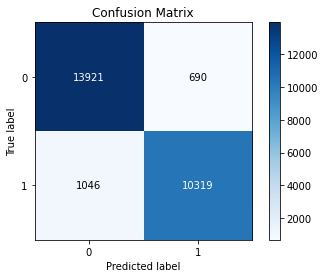

In [167]:
#we get our best classifier for random forest:
rf_clf = RandomForestClassifier(n_estimators = 200,
                            max_features = 'sqrt', 
                            max_depth = 8,
                            criterion = 'entropy', 
                            random_state = 1,
                            verbose = 0)
rf_clf.fit(x_train, y_train)

#test performance
print(f'Best perf on test set:{rf_clf.score(x_test, y_test):.2f}')

#confusion matrix
y_pred = rf_clf.predict(x_test)
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test, y_pred);

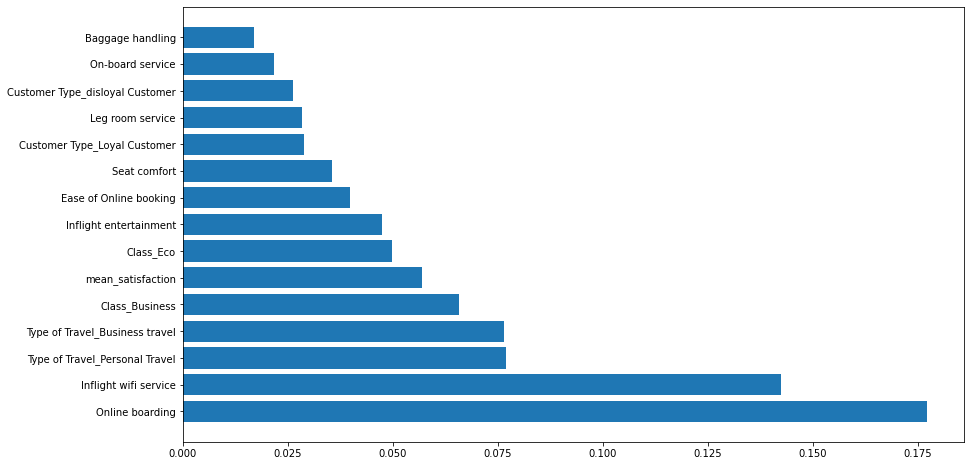

In [177]:
#Feature importance
feature_importance(rf_clf, x_train, y_train)